In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import torch
from torch import nn


In [2]:
train_data = pd.read_csv('../california/train.csv')
test_data = pd.read_csv('../california/test.csv')

In [3]:
train_data.shape, test_data.shape

((47439, 41), (31626, 40))

In [4]:
train_data.columns

Index(['Id', 'Address', 'Sold Price', 'Summary', 'Type', 'Year built',
       'Heating', 'Cooling', 'Parking', 'Lot', 'Bedrooms', 'Bathrooms',
       'Full bathrooms', 'Total interior livable area', 'Total spaces',
       'Garage spaces', 'Region', 'Elementary School',
       'Elementary School Score', 'Elementary School Distance',
       'Middle School', 'Middle School Score', 'Middle School Distance',
       'High School', 'High School Score', 'High School Distance', 'Flooring',
       'Heating features', 'Cooling features', 'Appliances included',
       'Laundry features', 'Parking features', 'Tax assessed value',
       'Annual tax amount', 'Listed On', 'Listed Price', 'Last Sold On',
       'Last Sold Price', 'City', 'Zip', 'State'],
      dtype='object')

In [5]:
test_data.columns

Index(['Id', 'Address', 'Summary', 'Type', 'Year built', 'Heating', 'Cooling',
       'Parking', 'Lot', 'Bedrooms', 'Bathrooms', 'Full bathrooms',
       'Total interior livable area', 'Total spaces', 'Garage spaces',
       'Region', 'Elementary School', 'Elementary School Score',
       'Elementary School Distance', 'Middle School', 'Middle School Score',
       'Middle School Distance', 'High School', 'High School Score',
       'High School Distance', 'Flooring', 'Heating features',
       'Cooling features', 'Appliances included', 'Laundry features',
       'Parking features', 'Tax assessed value', 'Annual tax amount',
       'Listed On', 'Listed Price', 'Last Sold On', 'Last Sold Price', 'City',
       'Zip', 'State'],
      dtype='object')

In [6]:
# todo 特征处理

In [7]:
train_data.head()

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,...,"Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,...,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,...,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,...,"Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,...,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA


In [8]:
# 值特征和类别特征
numeric_features = train_data.iloc[:, 1:].dtypes[train_data.dtypes != 'object'].index
obj_features = train_data.dtypes[train_data.dtypes == 'object'].index

train_num = train_data[numeric_features]
train_obj = train_data[obj_features]


In [9]:
train_num

,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
0,3825000.0,1969.0,1.0,0.0,NaN,1.0,0.0,0.0,7.0,0.4,NaN,NaN,8.0,1.3,886486.0,12580.0,4198000.0,NaN,94022
1,505000.0,1926.0,4047.0,2.0,2.0,872.0,1.0,1.0,3.0,0.8,2.0,1.1,2.0,1.3,505000.0,6253.0,525000.0,328000.0,90047
2,140000.0,1958.0,9147.0,3.0,1.0,1152.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,10.1,49627.0,468.0,180000.0,NaN,95375
3,1775000.0,1947.0,NaN,3.0,3.0,2612.0,0.0,0.0,9.0,0.2,7.0,0.2,8.0,0.2,1775000.0,20787.0,1895000.0,1500000.0,90230
4,1175000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.5,5.0,10.2,6.0,10.6,NaN,NaN,1595000.0,900000.0,93432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47434,159000.0,1965.0,20908.8,2.0,2.0,1432.0,2.0,2.0,3.0,2.4,NaN,NaN,3.0,1.8,125049.0,1298.0,155000.0,NaN,92225
47435,255000.0,1999.0,NaN,2.0,2.0,1560.0,0.0,0.0,5.0,2.4,6.0,3.5,7.0,2.5,68924.0,721.0,295900.0,NaN,94089
47436,2300000.0,1919.0,6756.0,2.0,2.0,1860.0,0.0,0.0,7.0,0.6,3.0,1.5,7.0,0.8,578000.0,7211.0,2295000.0,2150000.0,90046
47437,500000.0,2017.0,5945.0,3.0,2.0,2125.0,4.0,4.0,7.0,0.5,7.0,1.0,8.0,1.2,484696.0,7627.0,499888.0,500000.0,95757


In [10]:
train_obj

,Address,Summary,Type,Heating,Cooling,Parking,Bedrooms,Region,Elementary School,Middle School,...,Flooring,Heating features,Cooling features,Appliances included,Laundry features,Parking features,Listed On,Last Sold On,City,State
0,540 Pine Ln,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered","Ground Floor Bedroom, Master Bedroom on Ground...",Los Altos,Santa Rita Elementary School,NaN,...,"Tile, Hardwood, Carpet","Forced air, Gas",Central,"Dishwasher, Dryer, Garbage disposal, Microwave...","Washer / Dryer, Inside, In Utility Room","Garage, Garage - Attached, Covered",2019-10-24,NaN,Los Altos,CA
1,1727 W 67th St,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",3,Los Angeles,Raymond Avenue Elementary School,John Muir Middle School,...,NaN,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...",NaN,Inside,"Detached Carport, Garage",2019-10-16,2019-08-30,Los Angeles,CA
2,28093 Pine Ave,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,Forced air,NaN,0 spaces,2,Strawberry,NaN,NaN,...,NaN,Forced air,NaN,NaN,NaN,NaN,2019-08-25,NaN,Strawberry,CA
3,10750 Braddock Dr,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",5,Culver City,Farragut Elementary School,Culver City Middle School,...,"Wood, Tile",Central,Central Air,Dishwasher,"Stackable, Upper Level","Detached Carport, Driveway, Garage - Two Door",2019-10-24,2016-08-30,Culver City,CA
4,7415 O Donovan Rd,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,0 spaces,NaN,Creston,Santa Margarita Elementary School,Atascadero Middle School,...,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-07,2016-06-27,Creston,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47434,2409 Florence Blvd,"2409 Florence Blvd, Blythe, CA 92225 is a sing...",SingleFamily,Central,Central Air,"Carport, Covered",3,Blythe,Margaret White Elementary School,NaN,...,"Carpet, Tile",Forced air,Central,"Dishwasher, Range / Oven",NaN,"Carport, Covered",2020-09-04,NaN,Blythe,CA
47435,1085 Tasman Dr SPACE 818,"LOOK AT THIS PRICE $30k PRICE REDUCTION, USE T...",MobileManufactured,"Central Forced Air, Gas",Central AC,Carport,3,Sunnyvale,George Mayne Elementary School,Marian A. Peterson Middle School,...,NaN,"Forced air, Gas",Central,NaN,Hookups Only,Carport,2020-07-23,NaN,Sunnyvale,CA
47436,1338 N Orange Grove Ave,Beautifully restored historic Colonial Revival...,SingleFamily,Central,Central Air,Driveway,3,West Hollywood,Gardner Street Elementary School,Hubert Howe Bancroft Middle School,...,"Tile, Wood",Central,Central Air,"Dishwasher, Disposal, Refrigerator, Washer, Dryer",Laundry Room,Driveway,2020-12-01,2015-05-01,Los Angeles,CA
47437,9996 Fan Shell Ln,Great opportunity to live in the friendly gate...,SingleFamily,Central,Central Air,"Garage, Carport, Garage - Attached, Covered",3,Elk Grove,Helen Carr Castello Elementary School,Toby Johnson Middle School,...,"Carpet, Laminate","Forced air, Electric",Central,NaN,Inside Room,"Garage, Carport, Garage - Attached, Covered",2020-08-01,2020-08-24,Elk Grove,CA


### 数值特征处理

In [11]:
train_num.describe()

,Sold Price,Year built,Lot,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,Elementary School Distance,Middle School Score,Middle School Distance,High School Score,High School Distance,Tax assessed value,Annual tax amount,Listed Price,Last Sold Price,Zip
count,4.743900e+04,46394.000000,3.325800e+04,43974.000000,39574.000000,4.491300e+04,46523.000000,46522.000000,42543.000000,42697.000000,30734.000000,30735.000000,42220.000000,42438.000000,4.378700e+04,43129.000000,4.743900e+04,2.967300e+04,47439.000000
mean,1.296050e+06,1956.634888,2.353383e+05,2.355642,2.094961,5.774587e+03,1.567117,1.491746,5.720824,1.152411,5.317206,1.691593,6.134344,2.410366,7.863118e+05,9956.843817,1.315890e+06,8.078537e+05,93279.178587
std,1.694452e+06,145.802456,1.192507e+07,1.188805,0.963320,8.324363e+05,9.011608,8.964319,2.103350,2.332367,2.002768,2.462879,1.984711,3.596120,1.157796e+06,13884.254976,2.628695e+06,1.177903e+06,2263.459104
min,1.005000e+05,0.000000,0.000000e+00,0.000000,1.000000,1.000000e+00,-15.000000,-15.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,85611.000000
25%,5.650000e+05,1946.000000,4.991000e+03,2.000000,2.000000,1.187000e+03,0.000000,0.000000,4.000000,0.300000,4.000000,0.600000,5.000000,0.800000,2.549615e+05,3467.000000,5.745000e+05,3.350000e+05,90220.000000
50%,9.600000e+05,1967.000000,6.502000e+03,2.000000,2.000000,1.566000e+03,1.000000,1.000000,6.000000,0.500000,5.000000,1.000000,6.000000,1.300000,5.475240e+05,7129.000000,9.490000e+05,5.980000e+05,94114.000000
75%,1.525000e+06,1989.000000,1.045400e+04,3.000000,2.000000,2.142000e+03,2.000000,2.000000,7.000000,1.000000,7.000000,1.800000,8.000000,2.400000,9.371625e+05,12010.000000,1.498844e+06,9.500000e+05,95073.000000
max,9.000000e+07,9999.000000,1.897474e+09,24.000000,17.000000,1.764164e+08,1000.000000,1000.000000,10.000000,57.200000,9.000000,57.200000,10.000000,73.900000,4.590000e+07,552485.000000,4.025320e+08,9.000000e+07,96155.000000


C:\Users\admin\AppData\Local\Temp\ipykernel_23664\1712770402.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)


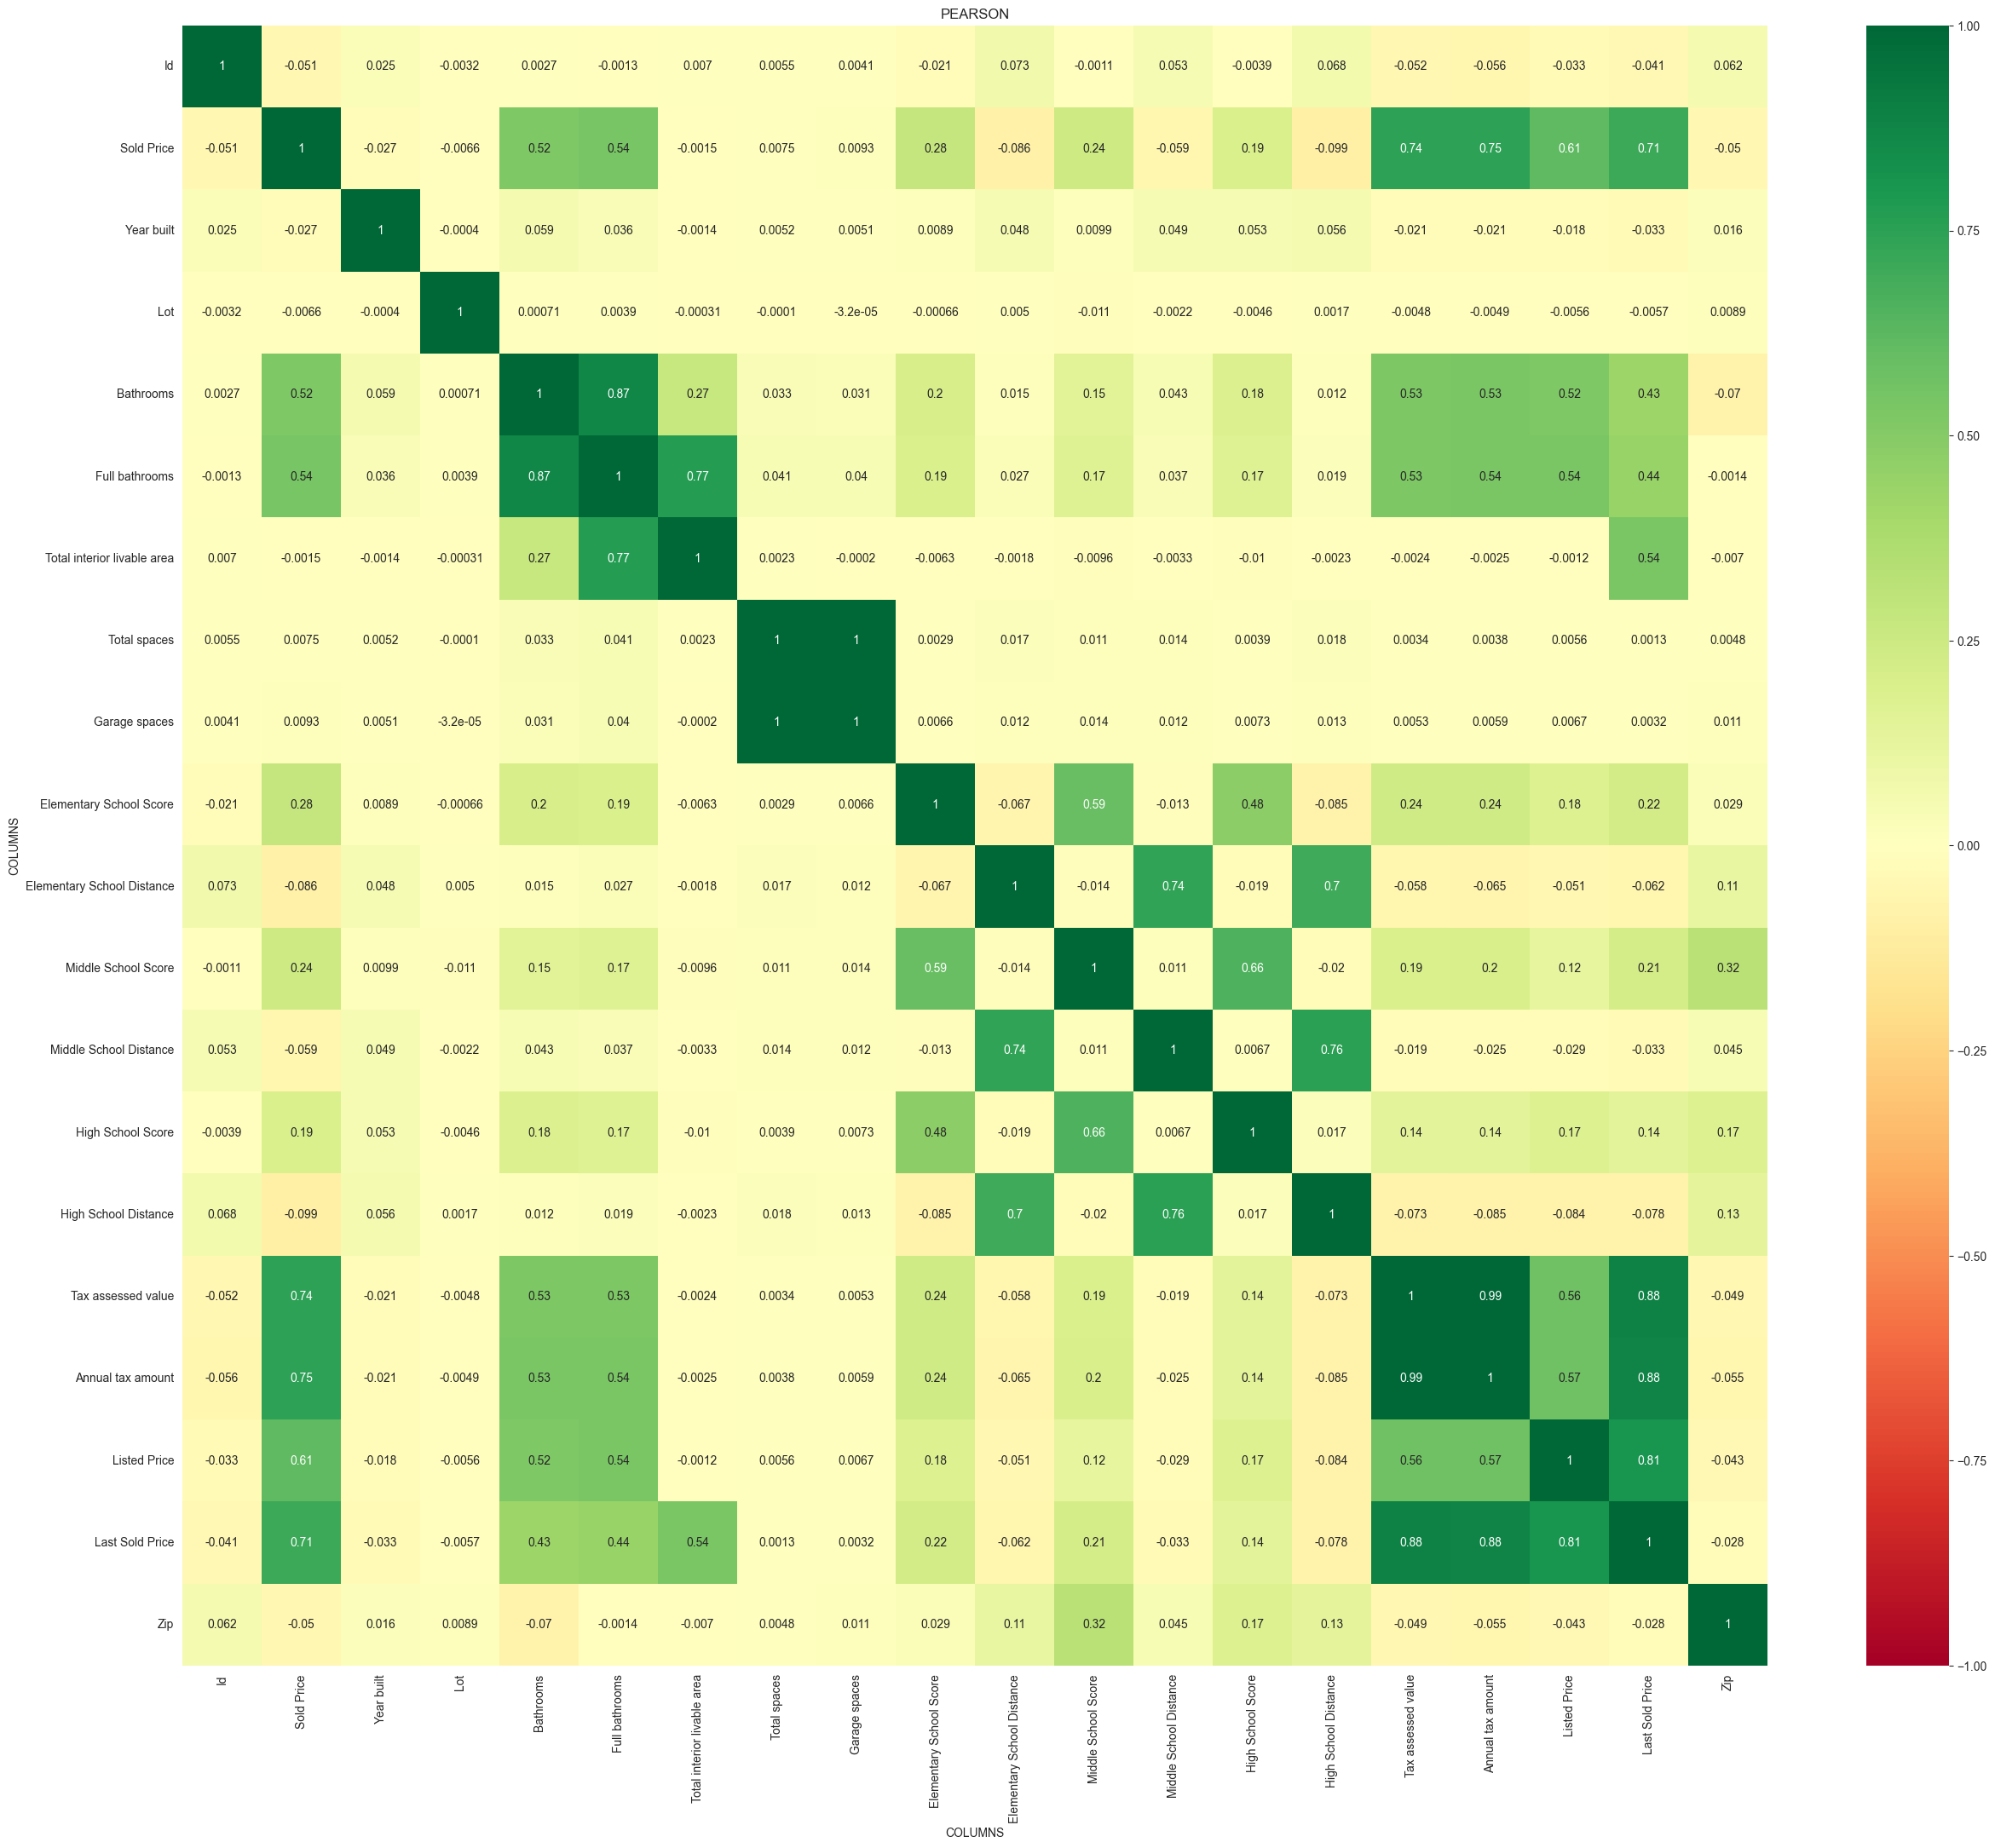

In [12]:
figure = plt.figure(figsize=(30,25))
sns.heatmap(train_data.corr(), annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("PEARSON")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

In [13]:
train_num.columns

Index(['Sold Price', 'Year built', 'Lot', 'Bathrooms', 'Full bathrooms',
       'Total interior livable area', 'Total spaces', 'Garage spaces',
       'Elementary School Score', 'Elementary School Distance',
       'Middle School Score', 'Middle School Distance', 'High School Score',
       'High School Distance', 'Tax assessed value', 'Annual tax amount',
       'Listed Price', 'Last Sold Price', 'Zip'],
      dtype='object')

In [14]:
def plot_scatter(x_label, y_label):
    fig, ax = plt.subplots()
    ax.scatter(x = train_data[x_label], y = train_data[y_label])
    plt.xlabel(x_label, fontsize=13)
    plt.ylabel(y_label, fontsize=13)
    plt.show()

In [26]:
main_num_features = ['Bathrooms', 'Full bathrooms', 'Tax assessed value', 'Annual tax amount',
                 'Listed Price', 'Last Sold Price']

for main_num_feature in main_num_features:
    print(train_data[main_num_feature].value_counts())
    print("------"*20)

2.0     19594
3.0     11207
1.0      7863
4.0      2974
5.0       993
0.0       497
6.0       456
7.0       164
8.0        93
9.0        46
10.0       30
11.0       20
12.0       10
13.0        6
14.0        5
16.0        2
18.0        1
17.0        1
24.0        1
19.0        1
21.0        1
15.0        1
20.0        1
Name: Bathrooms, dtype: int64
------------------------------------------------------------------------------------------------------------------------
2.0     21013
1.0      9431
3.0      6665
4.0      1603
5.0       496
6.0       203
7.0        64
8.0        48
9.0        21
10.0        9
11.0        7
12.0        4
17.0        1
14.0        1
15.0        1
13.0        1
Name: Full bathrooms, dtype: int64
------------------------------------------------------------------------------------------------------------------------
1224000.0    30
867000.0     27
918000.0     27
1530000.0    24
1200000.0    24
             ..
54190.0       1
948192.0      1
668295.0      1
222

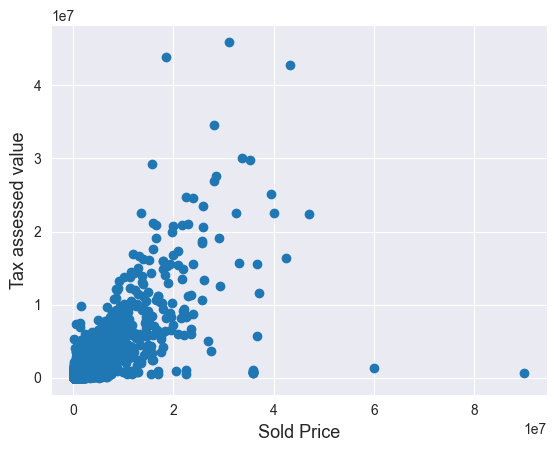

In [17]:
plot_scatter('Sold Price', 'Tax assessed value')

In [18]:
train_data = train_data.drop(train_data[(train_data['Tax assessed value']>4 * 1e7) | (train_data['Sold Price']>5 * 1e7)].index)

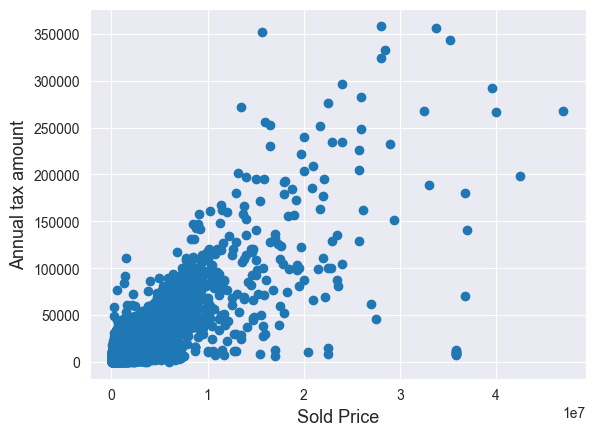

In [19]:
plot_scatter('Sold Price', 'Annual tax amount')
#, 'Listed Price', 'Last Sold Price'

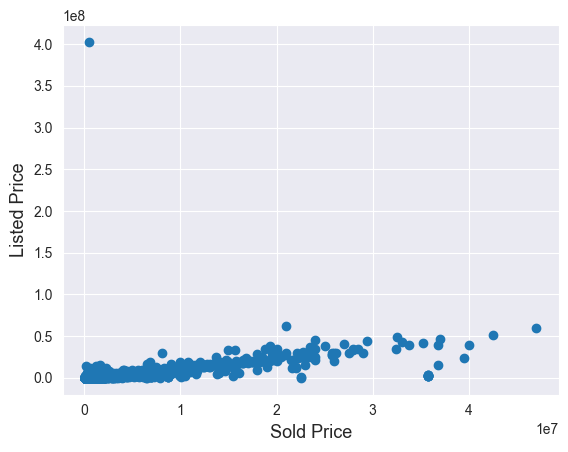

In [20]:
plot_scatter('Sold Price', 'Listed Price')

In [21]:
train_data = train_data.drop(train_data[(train_data['Listed Price']>1e8)].index)

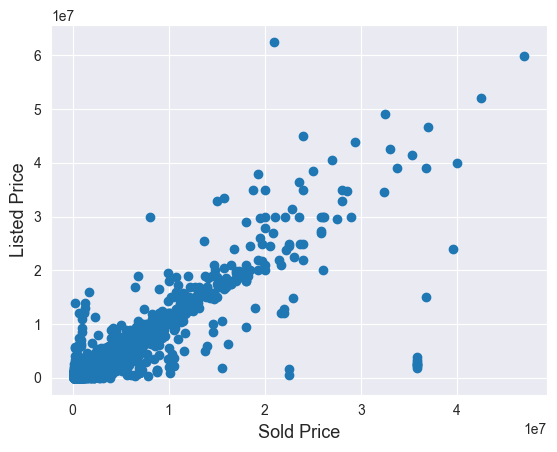

In [22]:
plot_scatter('Sold Price', 'Listed Price')

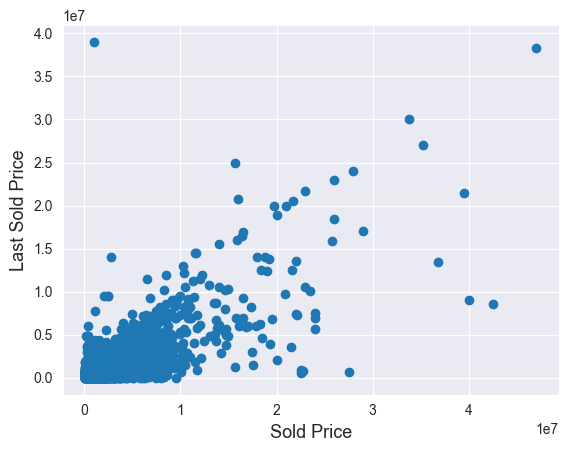

In [23]:
plot_scatter('Sold Price', 'Last Sold Price')

In [24]:
train_data = train_data.drop(train_data[(train_data['Last Sold Price']> 3.5 * 1e7)].index)

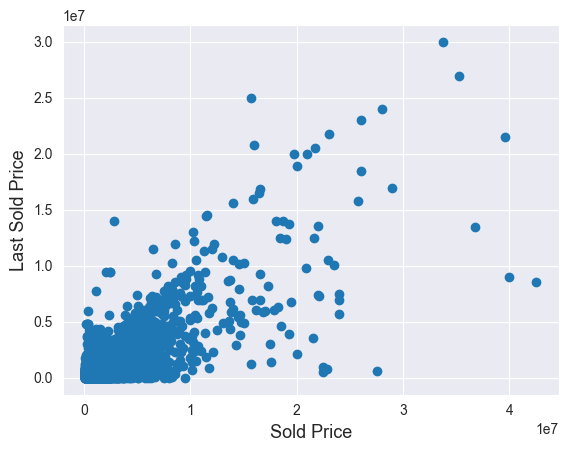

In [25]:
plot_scatter('Sold Price', 'Last Sold Price')

### 类别特征处理

In [27]:
print(train_obj.shape)
print("------"*20)
print(train_obj.columns)
print("------"*20)
print(train_obj.info())
print("------"*20)
print(train_obj.describe())
print("------"*20)

(47439, 21)
------------------------------------------------------------------------------------------------------------------------
Index(['Address', 'Summary', 'Type', 'Heating', 'Cooling', 'Parking',
       'Bedrooms', 'Region', 'Elementary School', 'Middle School',
       'High School', 'Flooring', 'Heating features', 'Cooling features',
       'Appliances included', 'Laundry features', 'Parking features',
       'Listed On', 'Last Sold On', 'City', 'State'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47439 entries, 0 to 47438
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              47439 non-null  object
 1   Summary              47089 non-null  object
 2   Type                 47439 non-null  object
 3   Heating              40974 non

In [29]:
for obj_feature in obj_features:
    print(train_data[obj_feature].value_counts())
    print("------"*20)

55 W 20th Ave               4
425 N El Camino Real        3
400 Mariners Island Blvd    3
1 Appian Way                3
123 Main St                 2
                           ..
1200 N Las Palmas Ave       1
655 Glencrag Way            1
15920 La Escuela Ct         1
852 S Curson Ave            1
4552 Howard Ave             1
Name: Address, Length: 47317, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Neighboring The Ace Hotel, 939 S. Broadway is the epitome of effort lessliving in Downtown Los Angeles. While the former Western Costume Building maintains its iconic exterior architecture, each residence has been renovated to feature the finest modern details. Stainless steel appliances and Quartz countertops add contemporary sophistication to the loft-style, industrial chic interiors. The original, towering windows, capture abundant natural light and reveal dynamic views of Downtown Los Angeles. One

In [30]:
main_obj_features = ['Type', 'Cooling', 'Bedrooms', 'Region',
                     'Cooling features', 'City', 'State']

for main_obj_feature in main_obj_features:
    print(train_data[main_obj_feature].value_counts())
    print("------"*20)

SingleFamily                     31318
Condo                             8093
Townhouse                         2545
Unknown                           1596
MultiFamily                       1292
                                 ...  
Detached                             1
Unit Below, 2 Level, Detached        1
Flat, Low-Rise (1-3)                 1
Mid-Rise (4-8), End Unit             1
Detached, 3 Story, Attached          1
Name: Type, Length: 158, dtype: int64
------------------------------------------------------------------------------------------------------------------------
None                                                     10071
Central Air                                               8872
Central AC                                                6066
Central                                                   2753
Ceiling Fan                                               1137
                                                         ...  
Dual, Wall Unit(s)                

In [32]:
ntrain = train_data.shape[0]
ntest = test_data.shape[0]
y_train = train_data['Sold Price'].values
all_features = main_num_features + main_obj_features

train_labels = torch.tensor(train_data['Sold Price'].values.reshape(-1, 1),
                               dtype=torch.float32)

train_data1 = train_data[all_features]
test_data1 = test_data[all_features]
all_data = pd.concat((train_data1, test_data1)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (79057, 13)
